In [55]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import shapiro
from sklearn.cluster import KMeans
from sklearn.model_selection import cross_validate
import numpy as np

In [2]:
df = pd.read_csv("Datasets/wholesale_customer_data/Wholesale customers data.csv")
df.head()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,3,12669,9656,7561,214,2674,1338
1,2,3,7057,9810,9568,1762,3293,1776
2,2,3,6353,8808,7684,2405,3516,7844
3,1,3,13265,1196,4221,6404,507,1788
4,2,3,22615,5410,7198,3915,1777,5185


In [3]:
df.shape

(440, 8)

In [4]:
df.describe()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
count,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000
mean,1.322727,2.543182,12000.297727,5796.265909,7951.277273,3071.931818,2881.493182,1524.870455
std,0.468052,0.774272,12647.328865,7380.377175,9503.162829,4854.673333,4767.854448,2820.105937
min,1.000000,1.000000,3.000000,55.000000,3.000000,25.000000,3.000000,3.000000
25%,1.000000,2.000000,3127.750000,1533.000000,2153.000000,742.250000,256.750000,408.250000
50%,1.000000,3.000000,8504.000000,3627.000000,4755.500000,1526.000000,816.500000,965.500000
75%,2.000000,3.000000,16933.750000,7190.250000,10655.750000,3554.250000,3922.000000,1820.250000
max,2.000000,3.000000,112151.000000,73498.000000,92780.000000,60869.000000,40827.000000,47943.000000


In [7]:
df.isnull().sum()

Channel             0
Region              0
Fresh               0
Milk                0
Grocery             0
Frozen              0
Detergents_Paper    0
Delicassen          0
dtype: int64

In [8]:
df.Channel.value_counts()

Channel
1    298
2    142
Name: count, dtype: int64

In [9]:
df.Region.value_counts()

Region
3    316
1     77
2     47
Name: count, dtype: int64

# Standardize the Data

In [11]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
norm = scaler.fit_transform(df)

In [14]:
norm = pd.DataFrame(norm, columns=df.columns)

In [15]:
norm.head()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,1.0,1.0,0.112940,0.130727,0.081464,0.003106,0.065427,0.027847
1,1.0,1.0,0.062899,0.132824,0.103097,0.028548,0.080590,0.036984
2,1.0,1.0,0.056622,0.119181,0.082790,0.039116,0.086052,0.163559
3,0.0,1.0,0.118254,0.015536,0.045464,0.104842,0.012346,0.037234
4,1.0,1.0,0.201626,0.072914,0.077552,0.063934,0.043455,0.108093


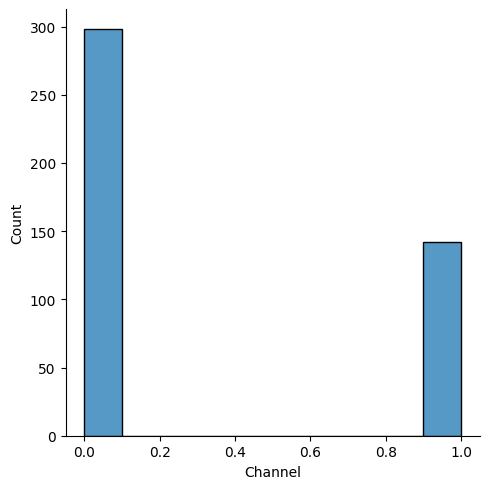

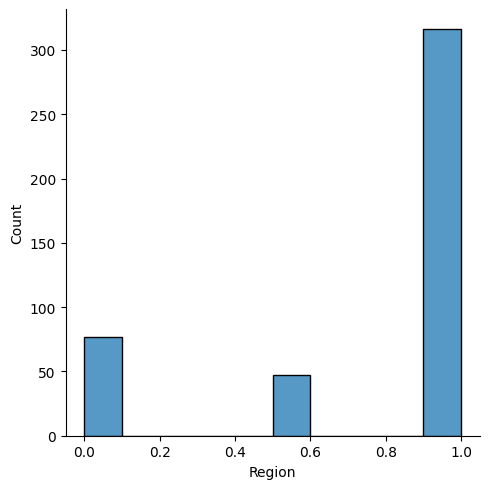

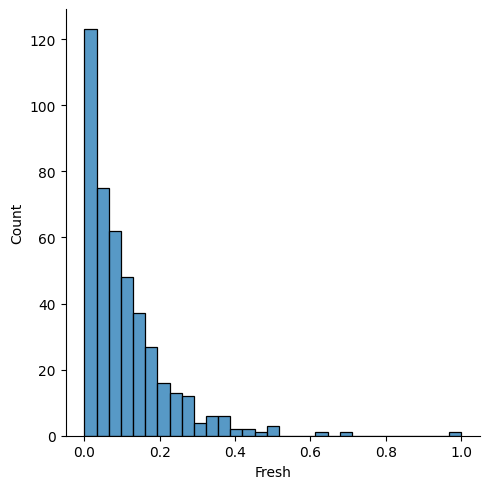

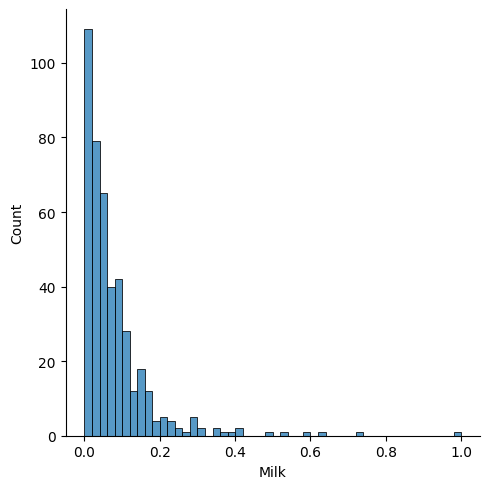

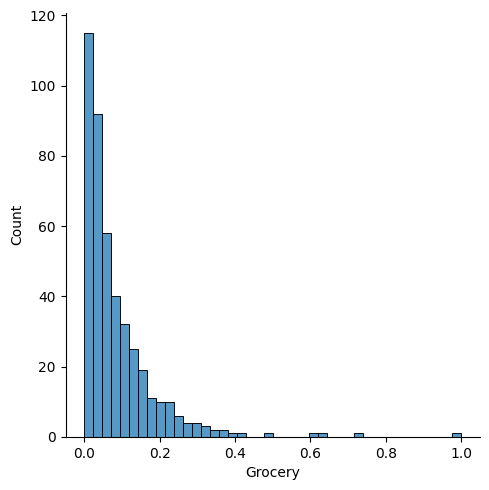

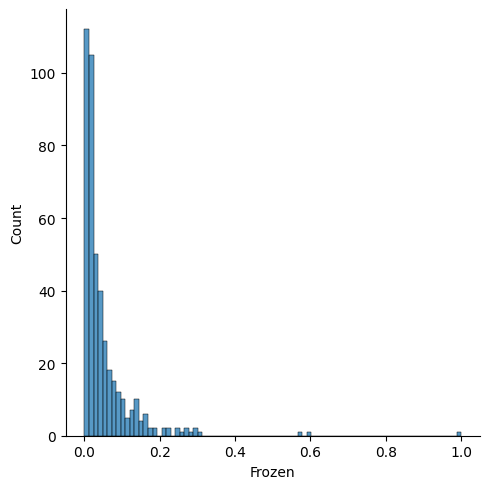

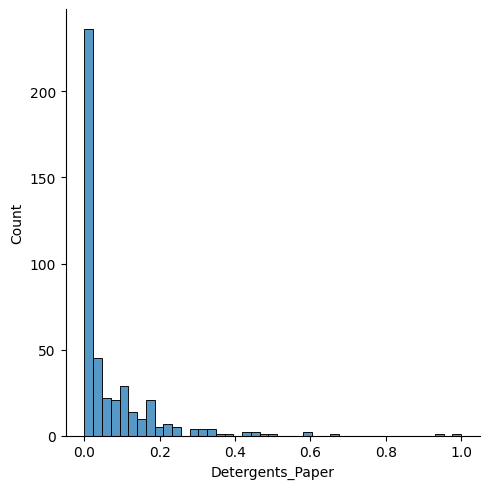

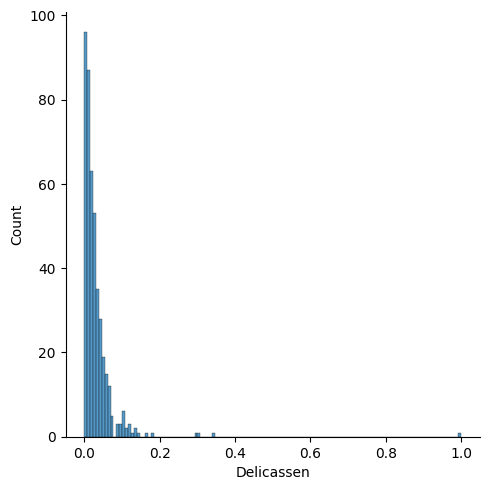

In [26]:
for key in norm.columns:
    fig = sns.displot(norm, x=key)

In [29]:
for each_col in df.columns:
    s = shapiro(norm[each_col])
    print (f"{each_col}: {s}")

Channel: ShapiroResult(statistic=0.5891129374504089, pvalue=6.237821428146971e-31)
Region: ShapiroResult(statistic=0.5926022529602051, pvalue=7.898492608711832e-31)
Fresh: ShapiroResult(statistic=0.7814362049102783, pvalue=7.91843824961924e-24)
Milk: ShapiroResult(statistic=0.6283338665962219, pvalue=9.762061919511109e-30)
Grocery: ShapiroResult(statistic=0.6762301325798035, pvalue=3.906127057558714e-28)
Frozen: ShapiroResult(statistic=0.528296947479248, pvalue=1.2913321191929252e-32)
Detergents_Paper: ShapiroResult(statistic=0.6054821610450745, pvalue=1.9145929126306173e-30)
Delicassen: ShapiroResult(statistic=0.36106783151626587, pvalue=1.7534077741301854e-36)


# KMeans

In [40]:
elbow_results=[]
cluster_range = range(2,10)
for i in range(2,10):
    kmeans=KMeans(init='k-means++' , n_clusters=i, random_state=0)
    results=cross_validate(kmeans, norm, cv=5)
    elbow_results.append(results['test_score'].mean()*-1)

In [41]:
elbow_results

[22.225074996178733,
 17.39588057849887,
 8.995307698149972,
 8.773451745211904,
 8.143433064039858,
 7.8922012290517145,
 7.85208561768886,
 7.177882868062303]

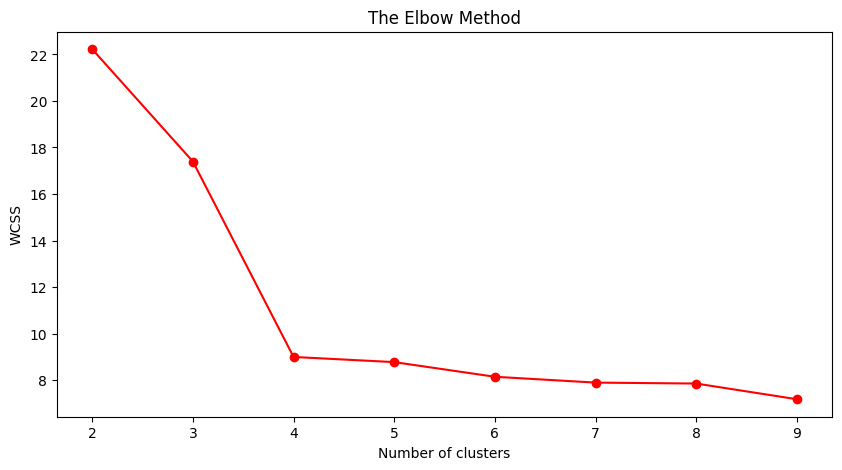

In [53]:
plt.figure(figsize=(10,5))
#sns.lineplot(elbow_results, marker='o',color='red')
plt.plot(cluster_range, elbow_results, marker='o',color='red')
plt.xticks(cluster_range)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

Optimal K looks to be 4

In [63]:
kmeans = KMeans(n_clusters = 4, init = "k-means++", random_state = 42,n_init=10, algorithm='elkan')
kmeans.fit(norm)
cluster_labels = kmeans.predict(norm)

In [66]:
norm['clusters'] = cluster_labels
value_counts = norm['clusters'].value_counts()

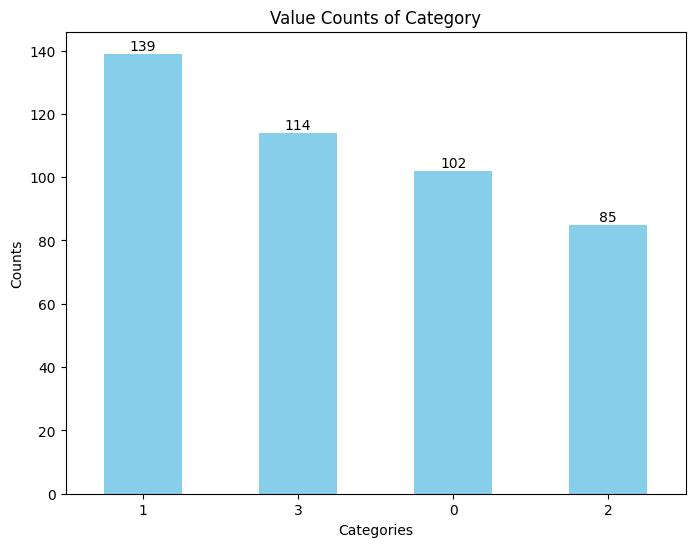

In [149]:
plt.figure(figsize=(8, 6))
ax = value_counts.plot(kind='bar', color='skyblue')

for i in ax.containers:
    ax.bar_label(i,)


plt.title('Value Counts of Category')
plt.xlabel('Categories')
plt.ylabel('Counts')
plt.xticks(rotation=0)
plt.show()


In [69]:
norm.head()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen,clusters
0,1.0,1.0,0.112940,0.130727,0.081464,0.003106,0.065427,0.027847,2
1,1.0,1.0,0.062899,0.132824,0.103097,0.028548,0.080590,0.036984,3
2,1.0,1.0,0.056622,0.119181,0.082790,0.039116,0.086052,0.163559,3
3,0.0,1.0,0.118254,0.015536,0.045464,0.104842,0.012346,0.037234,2
4,1.0,1.0,0.201626,0.072914,0.077552,0.063934,0.043455,0.108093,2


In [70]:
kmeans.cluster_centers_

array([[ 0.28431373,  0.49509804,  0.09786385,  0.1143947 ,  0.11169667,
         0.08523501,  0.09538987,  0.03599761, 13.09803922],
       [ 0.17266187,  0.84892086,  0.06382535,  0.06749442,  0.06860909,
         0.03285995,  0.05806237,  0.02451941,  1.30215827],
       [ 0.30588235,  0.99411765,  0.15541364,  0.05013364,  0.06989866,
         0.03334642,  0.05246914,  0.02630322, 18.11764706],
       [ 0.55263158,  0.75877193,  0.13163198,  0.07969135,  0.09494763,
         0.05209007,  0.07687729,  0.04080887,  5.3245614 ]])

In [161]:
from sklearn.metrics import adjusted_rand_score, normalized_mutual_info_score, fowlkes_mallows_score

In [159]:
def measure_cluster_metrics(cluster_labels, y_true, title):
    
    ari = adjusted_rand_score(y_true, cluster_labels)
    nmi = normalized_mutual_info_score(y_true, cluster_labels)
    fmi = fowlkes_mallows_score(y_true, cluster_labels)
    print (title)
    print (ari, nmi, fmi)
    return ari, nmi, fmi

# Dimensionality Reduction

# 1. PCA

In [71]:
from sklearn.decomposition import PCA

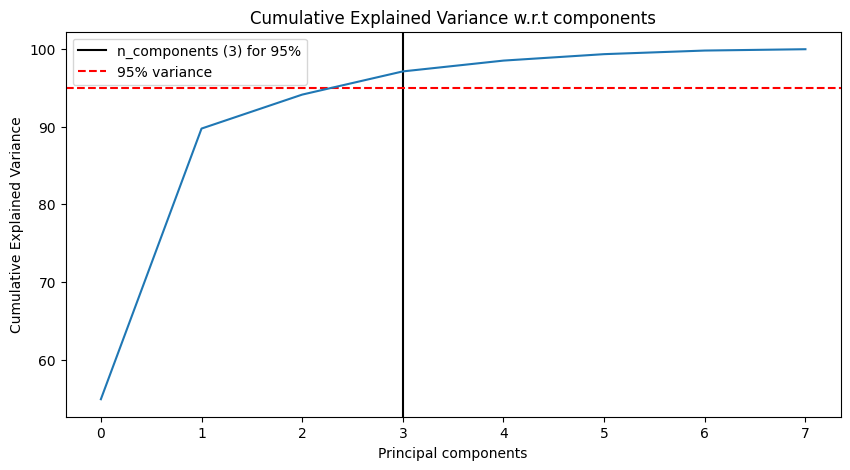

In [80]:
pca = PCA()
pca.fit(norm.iloc[:,:-1])

cum_variance = np.cumsum(pca.explained_variance_ratio_)*100

# Number of components that explain more than 95%
k = np.argmax(cum_variance > 95)

plt.figure(figsize=(10, 5))

plt.axvline(x=k, color='k', linestyle="-", label=f"n_components ({k}) for 95%")
plt.axhline(y=95, color='r', linestyle="--", label = "95% variance")
plt.plot(cum_variance)
plt.title("Cumulative Explained Variance w.r.t components")
plt.xlabel("Principal components")
plt.ylabel("Cumulative Explained Variance")
plt.legend()

# 2D visualization

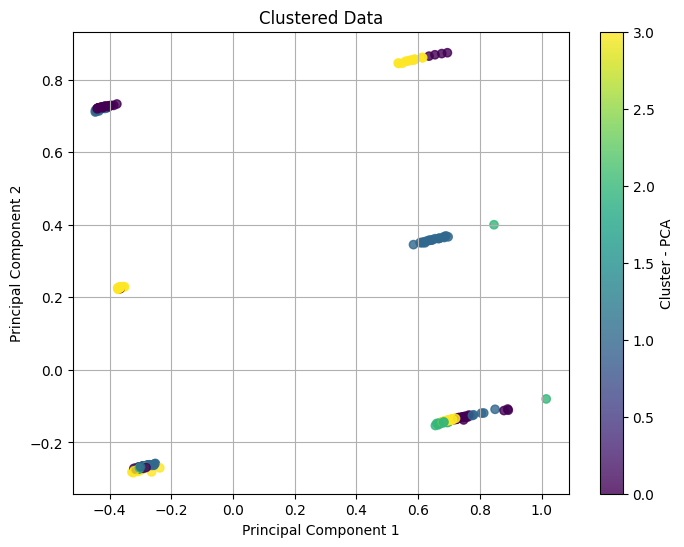

In [115]:
pca=PCA(n_components=2)

reduced_df = pca.fit_transform(norm.iloc[:,:-1])
reduced_df = pd.DataFrame(np.column_stack([reduced_df, norm.clusters]), columns=['Comp1','Comp2','Cluster'])

plt.figure(figsize=(8, 6))
plt.scatter(reduced_df['Comp1'], reduced_df['Comp2'], c=reduced_df.Cluster, cmap='viridis', alpha=0.8)
plt.title('Clustered Data')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.colorbar(label='Cluster - PCA')
plt.grid(True)
plt.show()

## 2. ICA

In [101]:
from scipy.stats import kurtosis
from sklearn.decomposition import FastICA

In [111]:
kurtosis_values = []
n_components_range = range(2,6)
for n in n_components_range:
    ica = FastICA(n_components=n)
    ica.fit(norm.iloc[:,:-1])
    kurtosis_components = kurtosis(ica.components_, axis=1)
    mean_kurtosis = np.mean(kurtosis_components)
    kurtosis_values.append(mean_kurtosis)

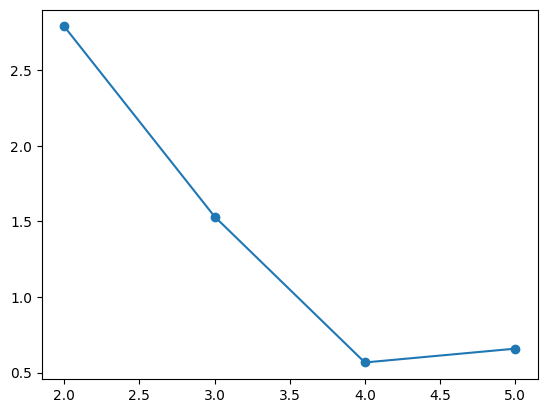

In [112]:
plt.plot([x for x in n_components_range], kurtosis_values, marker="o")

# 2D visualization

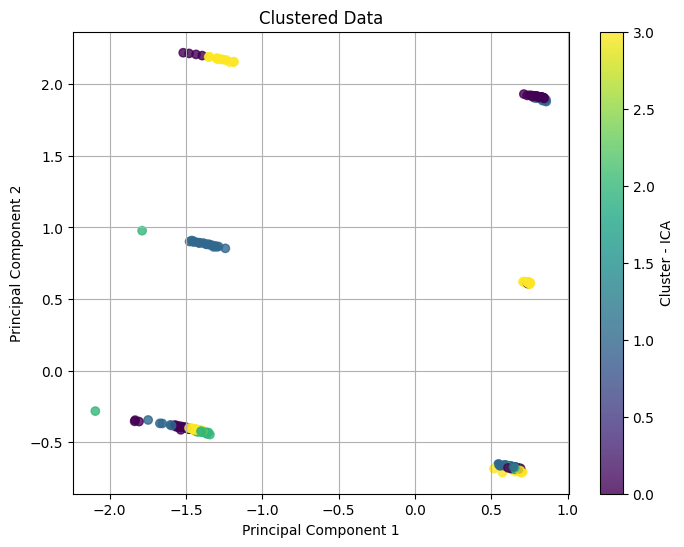

In [116]:
ica=FastICA(n_components=2)

reduced_df = ica.fit_transform(norm.iloc[:,:-1])
reduced_df = pd.DataFrame(np.column_stack([reduced_df, norm.clusters]), columns=['Comp1','Comp2','Cluster'])

plt.figure(figsize=(8, 6))
plt.scatter(reduced_df['Comp1'], reduced_df['Comp2'], c=reduced_df.Cluster, cmap='viridis', alpha=0.8)
plt.title('Clustered Data')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.colorbar(label='Cluster - ICA')
plt.grid(True)
plt.show()

## 3. GaussianRandomized Projections

In [117]:
from sklearn.random_projection import GaussianRandomProjection, johnson_lindenstrauss_min_dim

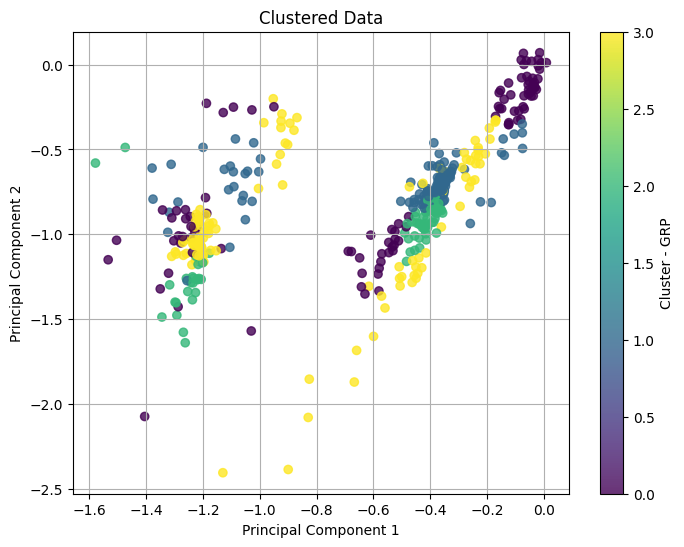

In [131]:
gauss_proj = GaussianRandomProjection(n_components=2)

#reduced_df = pd.DataFrame(reduced_data, columns=['Component1', 'Component2'])

reduced_df = gauss_proj.fit_transform(norm.iloc[:,:-1])
reduced_df = pd.DataFrame(np.column_stack([reduced_df, norm.clusters]), columns=['Comp1','Comp2','Cluster'])

plt.figure(figsize=(8, 6))
plt.scatter(reduced_df['Comp1'], reduced_df['Comp2'], c=reduced_df.Cluster, cmap='viridis', alpha=0.8)
plt.title('Clustered Data')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.colorbar(label='Cluster - GRP')
plt.grid(True)
plt.show()

## 4. MDS

In [128]:
from sklearn.manifold import MDS

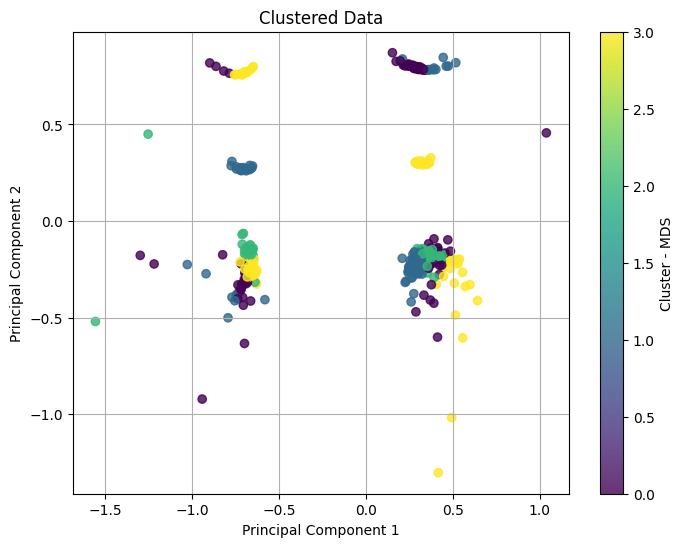

In [130]:
n_components = 2  # Reduce to 2 components
mds = MDS(n_components=n_components)

reduced_df = mds.fit_transform(norm.iloc[:,:-1])
reduced_df = pd.DataFrame(np.column_stack([reduced_df, norm.clusters]), columns=['Comp1','Comp2','Cluster'])

plt.figure(figsize=(8, 6))
plt.scatter(reduced_df['Comp1'], reduced_df['Comp2'], c=reduced_df.Cluster, cmap='viridis', alpha=0.8)
plt.title('Clustered Data')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.colorbar(label='Cluster - MDS')
plt.grid(True)
plt.show()

In [139]:
def plot_cluster_distribution(cls_method, k_optimal, cluster_labels, dim_reduction = 'pca'):
    cluster_dict = Counter(cluster_labels)
    ax = sns.barplot(x=list(cluster_dict.keys()), y=list(cluster_dict.values()), color='skyblue')
    plt.xticks(rotation=45)
    plt.tight_layout()
    
    for i in ax.containers:
        ax.bar_label(i,)
    title = f"wholesale-dataset - {dim_reduction} - {k_optimal}- {cls_method} "
    plt.title(title)
    plt.savefig(title)

# Clustering with reduced dimensions

In [132]:
# Reduce Dimensionality
def reduce_dim(X, target_dim = 100, algo='pca'):
    if algo == 'PCA':
        pca = PCA(n_components=target_dim)
        X_reduced = pca.fit_transform(X)
    elif algo == 'ICA':
        ica = FastICA(n_components=target_dim)
        X_reduced = ica.fit_transform(X)
    elif algo == 'GRP':
        projection_matrix = GaussianRandomProjection(n_components=target_dim)
        X_reduced = projection_matrix.fit_transform(X)
    else:
        mds = MDS(n_components=n_components)
        X_reduced = mds.fit_transform(X)
    return X_reduced

In [133]:
X_reduced_pca = reduce_dim(norm.iloc[:,:-1], algo='PCA', target_dim = 2)

In [134]:
X_reduced_ica = reduce_dim(norm.iloc[:,:-1], algo='ICA', target_dim = 2)

In [135]:
X_reduced_grp = reduce_dim(norm.iloc[:,:-1], algo='GRP', target_dim = 2)

In [136]:
X_reduced_mds = reduce_dim(norm.iloc[:,:-1], algo='MDS', target_dim = 2)

In [153]:
def run_kmeans_experiment(X_reduced, dim_reduction):
    kmeans = KMeans(n_clusters = 4, init = "k-means++", random_state = 42,n_init=10, algorithm='elkan')
    kmeans.fit(X_reduced)
    cluster_labels = kmeans.predict(X_reduced)
    plot_cluster_distribution("kmeans", 2, cluster_labels, dim_reduction)
    return cluster_labels

# Clustering with reduced features

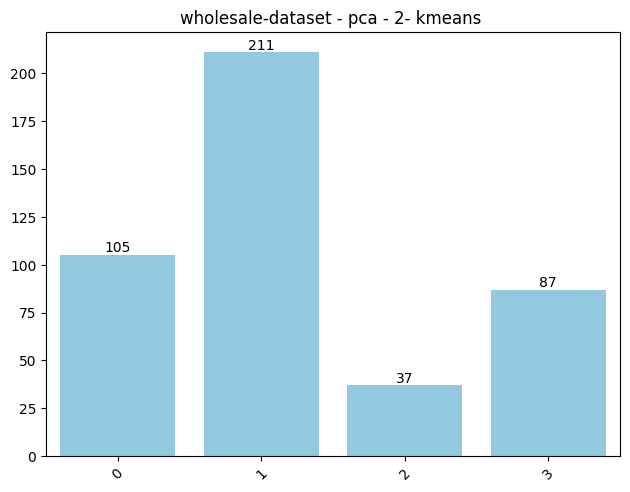

In [157]:
cluster_labels_pca = run_kmeans_experiment(X_reduced_pca, dim_reduction='pca')

In [162]:
measure_cluster_metrics(cluster_labels_pca, cluster_labels, title = "PCA - k=4")

PCA - k=4
0.1446408496694159 0.17382365975337125 0.3951854152457376


(0.1446408496694159, 0.17382365975337125, 0.3951854152457376)

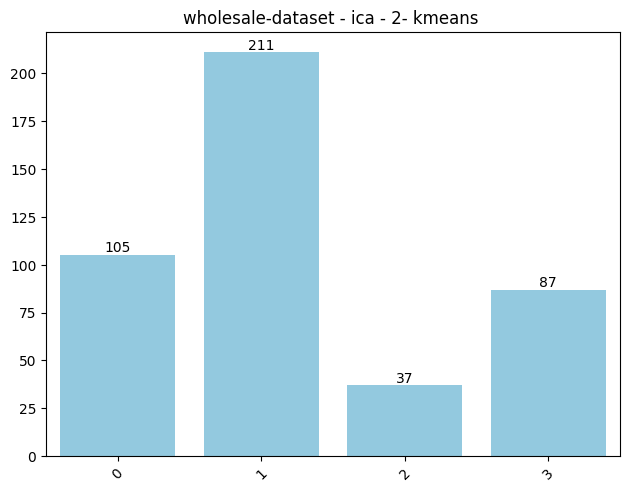

In [163]:
cluster_labels_ica = run_kmeans_experiment(X_reduced_ica, dim_reduction='ica')

In [164]:
measure_cluster_metrics(cluster_labels_ica, cluster_labels, title = "ICA - k=4")

ICA - k=4
0.1446408496694159 0.17382365975337125 0.3951854152457376


(0.1446408496694159, 0.17382365975337125, 0.3951854152457376)

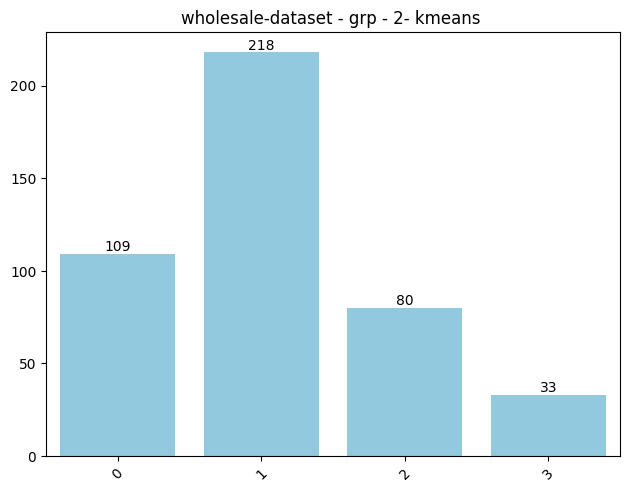

In [165]:
cluster_labels_grp = run_kmeans_experiment(X_reduced_grp, dim_reduction='grp')

In [166]:
measure_cluster_metrics(cluster_labels_grp, cluster_labels, title = "GRP - k=4")

GRP - k=4
0.12596788644940266 0.15561252532369374 0.38687246436029166


(0.12596788644940266, 0.15561252532369374, 0.38687246436029166)

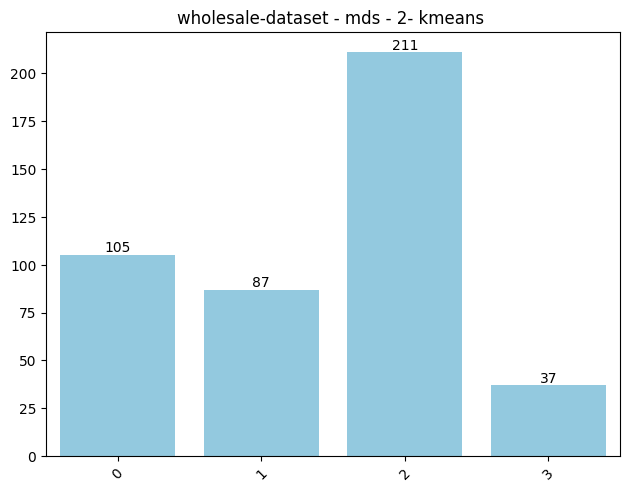

In [167]:
cluster_labels_mds = run_kmeans_experiment(X_reduced_mds, dim_reduction='mds')

In [168]:
measure_cluster_metrics(cluster_labels_mds, cluster_labels, title = "GRP - k=4")

GRP - k=4
0.1446408496694159 0.17382365975337127 0.3951854152457376


(0.1446408496694159, 0.17382365975337127, 0.3951854152457376)